# Forest Cover Type Classification

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data=pd.read_csv('/content/covtype.csv')

In [3]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

The dataset contains the following features:

*   **Elevation**: Elevation in meters (quantitative)
*   **Aspect**: Aspect in degrees azimuth (quantitative)
*   **Slope**: Slope in degrees (quantitative)
*   **Horizontal_Distance_To_Hydrology**: Horizontal distance to nearest surface water features in meters (quantitative)
*   **Vertical_Distance_To_Hydrology**: Vertical distance to nearest surface water features in meters (quantitative)
*   **Horizontal_Distance_To_Roadways**: Horizontal distance to nearest roadway in meters (quantitative)
*   **Hillshade_9am**: Hillshade index at 9 am, summer solstice (quantitative)
*   **Hillshade_Noon**: Hillshade index at noon, summer solstice (quantitative)
*   **Hillshade_3pm**: Hillshade index at 3 pm, summer solstice (quantitative)
*   **Horizontal_Distance_To_Fire_Points**: Horizontal distance to nearest wildfire ignition points in meters (quantitative)
*   **Wilderness_Area**: 4 binary columns representing wilderness areas (categorical)
*   **Soil_Type**: 40 binary columns representing soil types (categorical)
*   **Cover_Type**: Forest cover type (7 classes) (target variable)

In [7]:
data.shape

(581012, 55)

In [5]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
low_std_cols = std_dev[std_dev < 0.02].index.tolist()

if low_std_cols:
    print("Columns with standard deviation less than 0.02:")
    print(low_std_cols)
    data = data.drop(columns=low_std_cols)
    print("\nThese columns have been removed from the DataFrame.")
else:
    print("No columns found with standard deviation less than 0.02.")

Columns with standard deviation less than 0.02:
['Soil_Type7', 'Soil_Type8', 'Soil_Type15', 'Soil_Type36']

These columns have been removed from the DataFrame.


In [15]:
#start classes from 0 rather than 1
data['Cover_Type']=data['Cover_Type']-1

#Imbalanced data

In [16]:
data['Cover_Type'].value_counts()

,count
Cover_Type,
1,283301
0,211840
2,35754
6,20510
5,17367
4,9493
3,2747


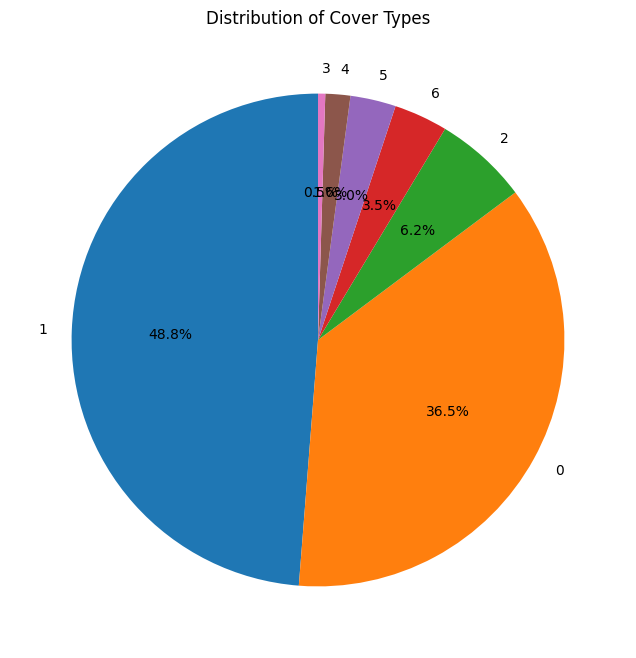

In [17]:
cover_type_counts = data['Cover_Type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(cover_type_counts, labels=cover_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Cover Types')
plt.show()

In [19]:
def split_and_scale(df):
    df = df.copy()

    # Split df into X and y
    y = df['Cover_Type'].copy()
    X = df.drop('Cover_Type', axis=1).copy()

    # Train-test-split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

    return X_train, X_test, y_train, y_test

In [20]:
def evaluate_model(model, class_balance, X_test, y_test):

    model_acc = model.score(X_test, y_test)
    print("Accuracy ({}): {:.2f}%".format(class_balance, model_acc * 100))

    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)

    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    print("Classification Report:\n----------------------\n", clr)

#Training (Imbalanced)

In [21]:
imbalanced_data = data.copy()

X_train, X_test, y_train, y_test = split_and_scale(imbalanced_data)

In [22]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy (Imbalanced): 72.41%


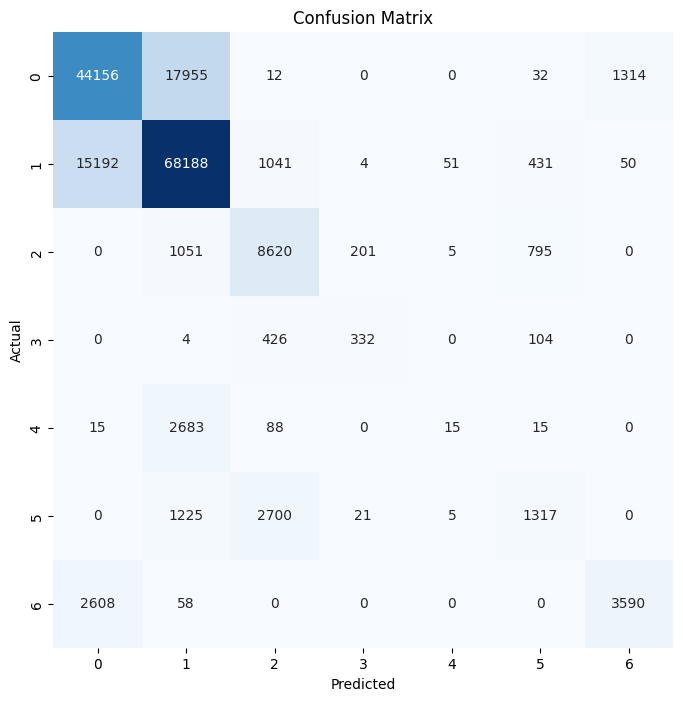

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.71      0.70      0.70     63469
           1       0.75      0.80      0.77     84957
           2       0.67      0.81      0.73     10672
           3       0.59      0.38      0.47       866
           4       0.20      0.01      0.01      2816
           5       0.49      0.25      0.33      5268
           6       0.72      0.57      0.64      6256

    accuracy                           0.72    174304
   macro avg       0.59      0.50      0.52    174304
weighted avg       0.71      0.72      0.71    174304



In [23]:
evaluate_model(model1, "Imbalanced", X_test, y_test)

#Training (Undersampling)

In [24]:
undersampled_data = data.copy()

In [25]:
undersampled_data['Cover_Type'].value_counts()

,count
Cover_Type,
1,283301
0,211840
2,35754
6,20510
5,17367
4,9493
3,2747


In [26]:
min_class_size = np.min(undersampled_data['Cover_Type'].value_counts().values)

print("Size of smallest class:", min_class_size)

Size of smallest class: 2747


In [27]:
# Undersampling the majority classes
class_subsets = [undersampled_data.query("Cover_Type == " + str(i)) for i in range(7)]

for i in range(7):
    class_subsets[i] = class_subsets[i].sample(min_class_size, replace=False, random_state=123)

undersampled_data = pd.concat(class_subsets, axis=0).sample(frac=1.0, random_state=123).reset_index(drop=True)

In [28]:
undersampled_data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3426,5,13,319,78,3844,202,213,147,3290,...,0,1,0,0,0,0,0,0,0,6
1,3032,138,12,124,17,1637,238,236,127,1080,...,0,0,0,0,0,0,0,0,0,0
2,2165,204,32,295,146,603,186,249,177,295,...,0,0,0,0,0,0,0,0,0,2
3,2834,80,16,513,169,532,240,210,95,2322,...,0,0,0,0,0,0,0,0,0,4
4,2972,293,4,30,5,1539,209,239,168,1630,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19224,2801,110,9,42,4,713,236,230,126,108,...,0,0,0,0,0,0,0,0,0,4
19225,2508,116,28,351,100,330,254,200,53,1209,...,0,0,0,0,0,0,0,0,0,2
19226,1998,325,32,335,143,306,125,187,193,969,...,0,0,0,0,0,0,0,0,0,5
19227,3370,315,3,0,0,4337,212,237,163,4160,...,0,0,0,0,0,0,0,0,1,6


In [29]:
undersampled_data['Cover_Type'].value_counts()

,count
Cover_Type,
6,2747
0,2747
2,2747
4,2747
1,2747
3,2747
5,2747


In [30]:
X_train, X_test, y_train, y_test = split_and_scale(undersampled_data)

In [31]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy (Undersampling): 70.77%


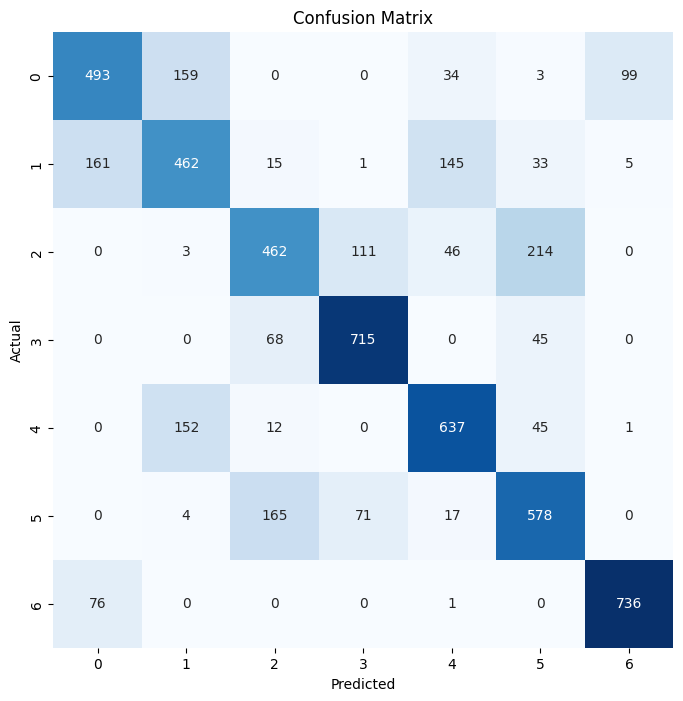

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.68      0.63      0.65       788
           1       0.59      0.56      0.58       822
           2       0.64      0.55      0.59       836
           3       0.80      0.86      0.83       828
           4       0.72      0.75      0.74       847
           5       0.63      0.69      0.66       835
           6       0.88      0.91      0.89       813

    accuracy                           0.71      5769
   macro avg       0.70      0.71      0.70      5769
weighted avg       0.70      0.71      0.70      5769



In [33]:
evaluate_model(model2, "Undersampling", X_test, y_test)

In [34]:
undersampled_data.var()

,0
Elevation,1.764160e+05
Aspect,1.207033e+04
Slope,7.154359e+01
Horizontal_Distance_To_Hydrology,4.412679e+04
Vertical_Distance_To_Hydrology,3.745399e+03
Horizontal_Distance_To_Roadways,1.813318e+06
Hillshade_9am,9.502731e+02
Hillshade_Noon,5.199366e+02
Hillshade_3pm,2.127035e+03
Horizontal_Distance_To_Fire_Points,1.215406e+06


In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
model3=DecisionTreeClassifier()
model3.fit(X_train,y_train)

DecisionTreeClassifier()

Accuracy (Undersampling): 79.94%


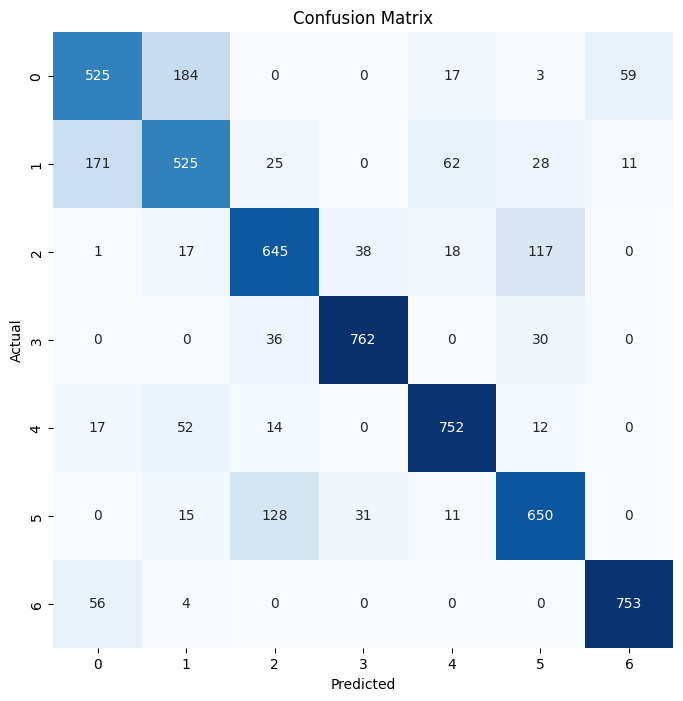

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.68      0.67      0.67       788
           1       0.66      0.64      0.65       822
           2       0.76      0.77      0.77       836
           3       0.92      0.92      0.92       828
           4       0.87      0.89      0.88       847
           5       0.77      0.78      0.78       835
           6       0.91      0.93      0.92       813

    accuracy                           0.80      5769
   macro avg       0.80      0.80      0.80      5769
weighted avg       0.80      0.80      0.80      5769



In [38]:
evaluate_model(model3, "Undersampling", X_test, y_test)

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
model4=RandomForestClassifier()
model4.fit(X_train,y_train)

RandomForestClassifier()

Accuracy (Undersampling): 86.65%


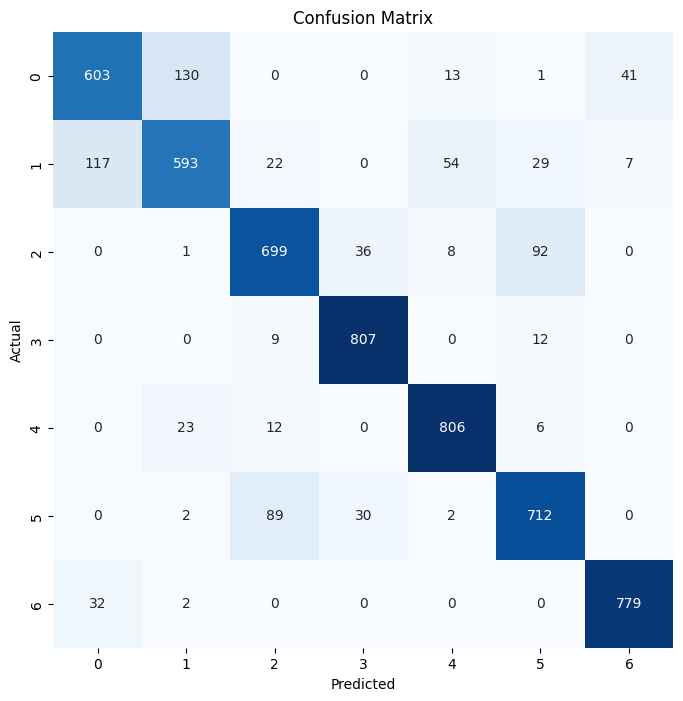

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.80      0.77      0.78       788
           1       0.79      0.72      0.75       822
           2       0.84      0.84      0.84       836
           3       0.92      0.97      0.95       828
           4       0.91      0.95      0.93       847
           5       0.84      0.85      0.84       835
           6       0.94      0.96      0.95       813

    accuracy                           0.87      5769
   macro avg       0.86      0.87      0.86      5769
weighted avg       0.86      0.87      0.86      5769



In [41]:
evaluate_model(model4, "Undersampling", X_test, y_test)

In [43]:
from xgboost import XGBClassifier

In [44]:
model5=XGBClassifier()
model5.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

Accuracy (Undersampling): 86.43%


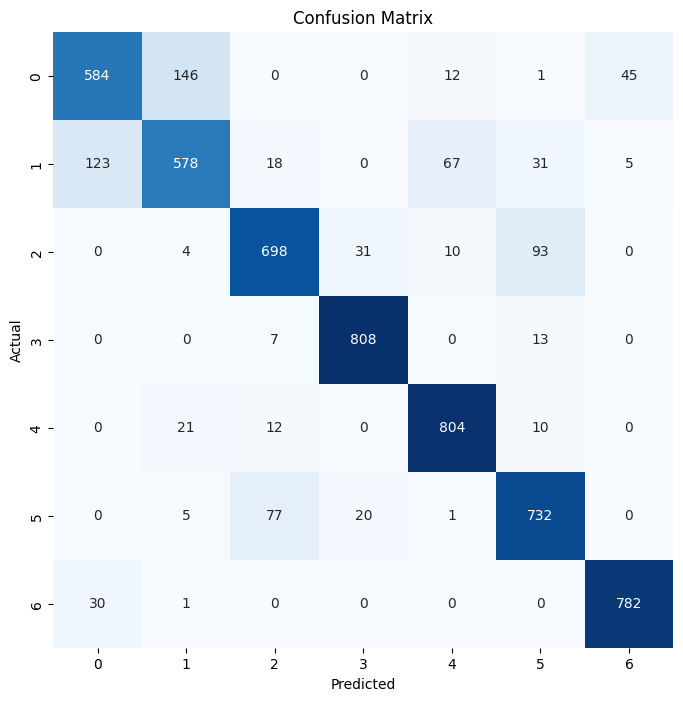

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.79      0.74      0.77       788
           1       0.77      0.70      0.73       822
           2       0.86      0.83      0.85       836
           3       0.94      0.98      0.96       828
           4       0.90      0.95      0.92       847
           5       0.83      0.88      0.85       835
           6       0.94      0.96      0.95       813

    accuracy                           0.86      5769
   macro avg       0.86      0.86      0.86      5769
weighted avg       0.86      0.86      0.86      5769



In [45]:
evaluate_model(model5, "Undersampling", X_test, y_test)

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
model6=GradientBoostingClassifier()
model6.fit(X_train,y_train)

GradientBoostingClassifier()

Accuracy (Undersampling): 80.22%


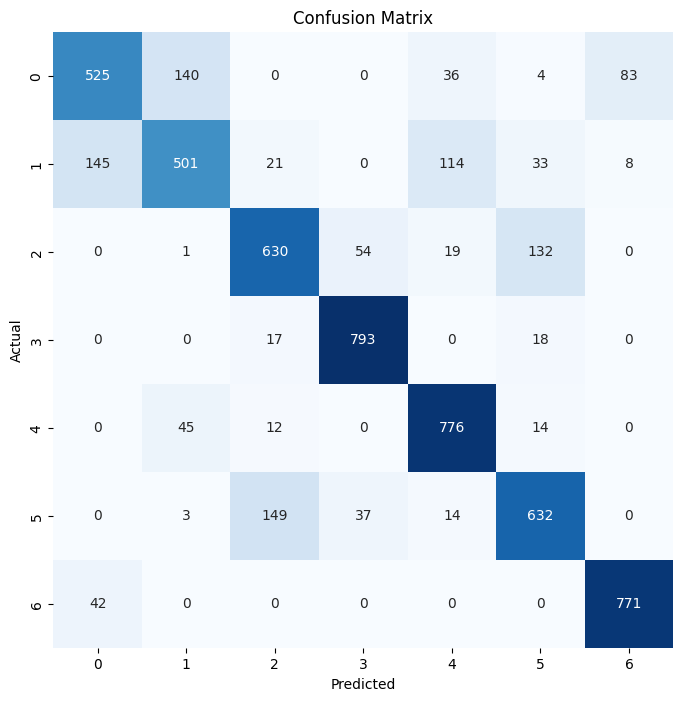

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.74      0.67      0.70       788
           1       0.73      0.61      0.66       822
           2       0.76      0.75      0.76       836
           3       0.90      0.96      0.93       828
           4       0.81      0.92      0.86       847
           5       0.76      0.76      0.76       835
           6       0.89      0.95      0.92       813

    accuracy                           0.80      5769
   macro avg       0.80      0.80      0.80      5769
weighted avg       0.80      0.80      0.80      5769



In [48]:
evaluate_model(model6, "Undersampling", X_test, y_test)